### Problem Statement
Create a model that can accurately predict whether a loan request will be approved or denied, based on the details provided by the applicant. The model should have high accuracy in determining loan approval outcomes.


In [1]:
# Import all the required library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set(style="darkgrid")

from sklearn.preprocessing import OrdinalEncoder 
from sklearn.preprocessing import StandardScaler 
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score,classification_report,f1_score, confusion_matrix
from warnings import filterwarnings
filterwarnings('ignore')


### Data Collection

In [2]:
# Import CSV file using pandas
df = pd.read_csv('loan_prediction.csv')
df.head(10)

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         614 non-null    int64  
 1   Loan_ID            614 non-null    object 
 2   Gender             601 non-null    object 
 3   Married            611 non-null    object 
 4   Dependents         599 non-null    object 
 5   Education          614 non-null    object 
 6   Self_Employed      582 non-null    object 
 7   ApplicantIncome    614 non-null    int64  
 8   CoapplicantIncome  614 non-null    float64
 9   LoanAmount         592 non-null    float64
 10  Loan_Amount_Term   600 non-null    float64
 11  Credit_History     564 non-null    float64
 12  Property_Area      614 non-null    object 
 13  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(2), object(8)
memory usage: 67.3+ KB


In [4]:
df.shape

(614, 14)

In [5]:
df.columns

Index(['Unnamed: 0', 'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### Data Preprocessing

In [6]:
# Remove unwanted column 
df.drop(['Unnamed: 0','Loan_ID'],axis=1,inplace=True)

In [7]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
# Checking Null Values
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
# Separate the categorical column
cat_col = df.select_dtypes(include='object').columns.tolist()
num_col = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

In [10]:
# fill null values of categorical column
def fill_missing_values(data,cols):
    for col in cols:
        data[col].fillna(data[col].mode()[0],inplace=True)

fill_missing_values(df,cat_col)

In [11]:
# To fill null values of numerical column first check descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [12]:
# Fill missing values in LoanAmount with the median
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

# Fill missing values in Loan_Amount_Term with the mode
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)

# Fill missing values in Credit_History with the mode
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

### EDA

Gender
Male      502
Female    112
Name: count, dtype: int64


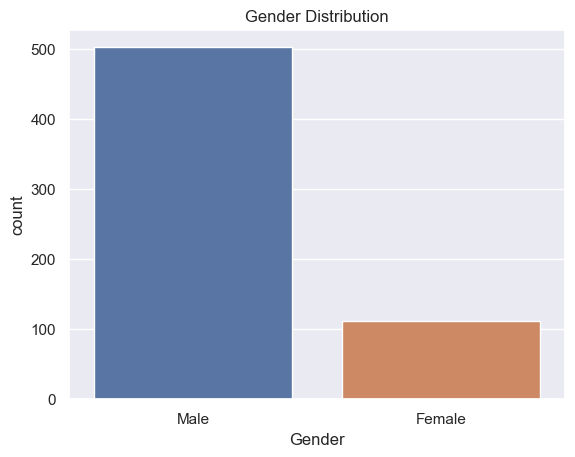

In [13]:
plt.title("Gender Distribution")
sns.countplot(x="Gender", data=df,hue="Gender")
print(df['Gender'].value_counts())

Married
Yes    401
No     213
Name: count, dtype: int64


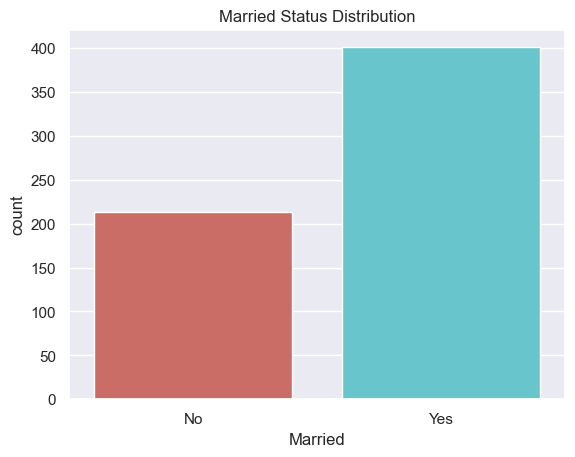

In [14]:
plt.title("Married Status Distribution")
sns.countplot(x="Married", data=df,palette='hls')
print(df['Married'].value_counts())

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


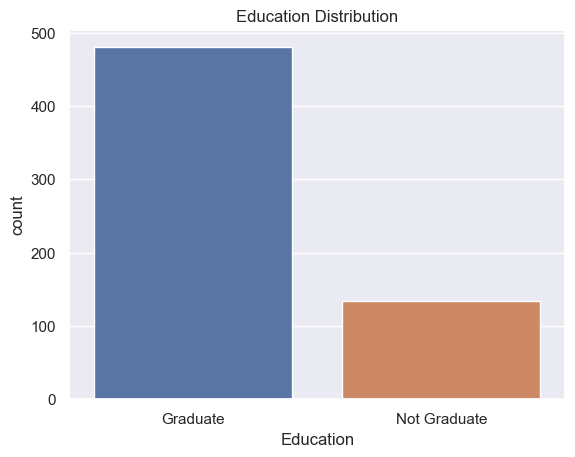

In [15]:
plt.title("Education Distribution")
sns.countplot(x="Education", data=df,hue="Education")
print(df['Education'].value_counts())

Self_Employed
No     532
Yes     82
Name: count, dtype: int64


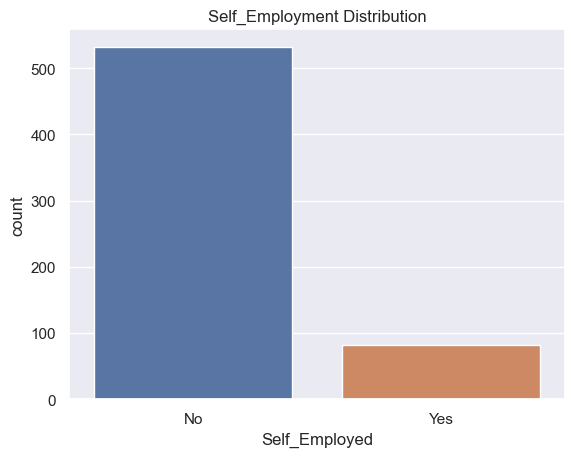

In [16]:
plt.title("Self_Employment Distribution")
sns.countplot(x="Self_Employed", data=df,hue="Self_Employed")
print(df['Self_Employed'].value_counts())

Loan_Status
Y    422
N    192
Name: count, dtype: int64


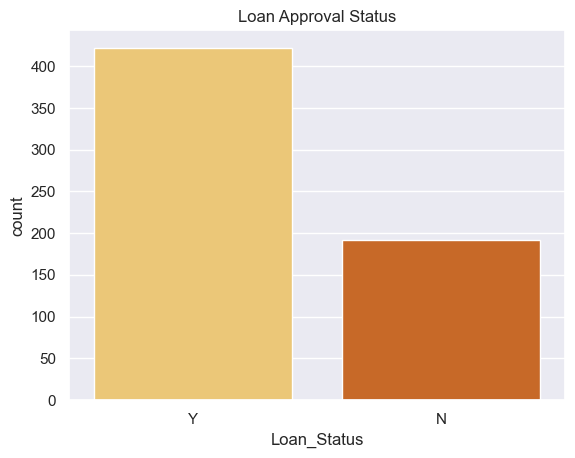

In [17]:
plt.title("Loan Approval Status")
sns.countplot(x="Loan_Status", data=df, palette="YlOrBr")
print(df['Loan_Status'].value_counts())

Credit_History
1.0    525
0.0     89
Name: count, dtype: int64


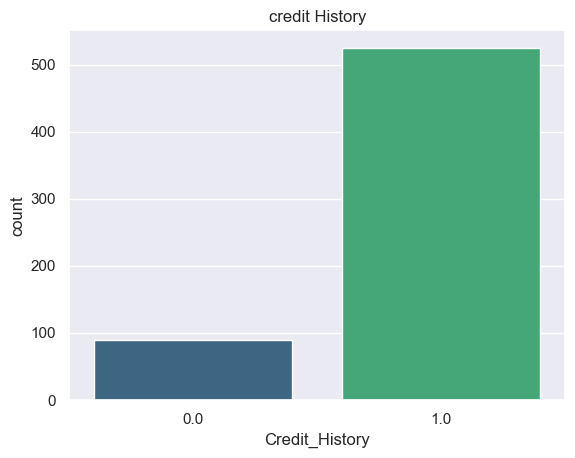

In [18]:
plt.title("credit History")
sns.countplot(x="Credit_History", data=df, palette="viridis")
print(df['Credit_History'].value_counts())

### Checking relational between categorical variable and target variable

In [19]:
px.histogram(df, x='Gender', color='Loan_Status',barmode='group',title='Loan_Status vs Gender')

In [20]:
px.histogram(df, x='Property_Area', color='Loan_Status',barmode='group',title='Loan_Status vs Property_Area')

In [21]:
px.histogram(df, x='Self_Employed', color='Loan_Status',barmode='group',title='Loan_Status vs Self_Employed')

In [22]:
px.histogram(df, x='Credit_History', color='Loan_Status',barmode='group',title='Loan_Status vs Credit_History')

Loan_Amount_Term
360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64


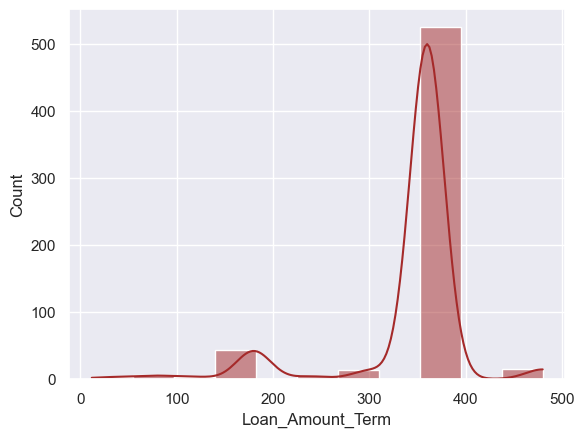

In [23]:
sns.histplot(data=df,x="Loan_Amount_Term",kde=True,color="Brown")
print(df['Loan_Amount_Term'].value_counts())

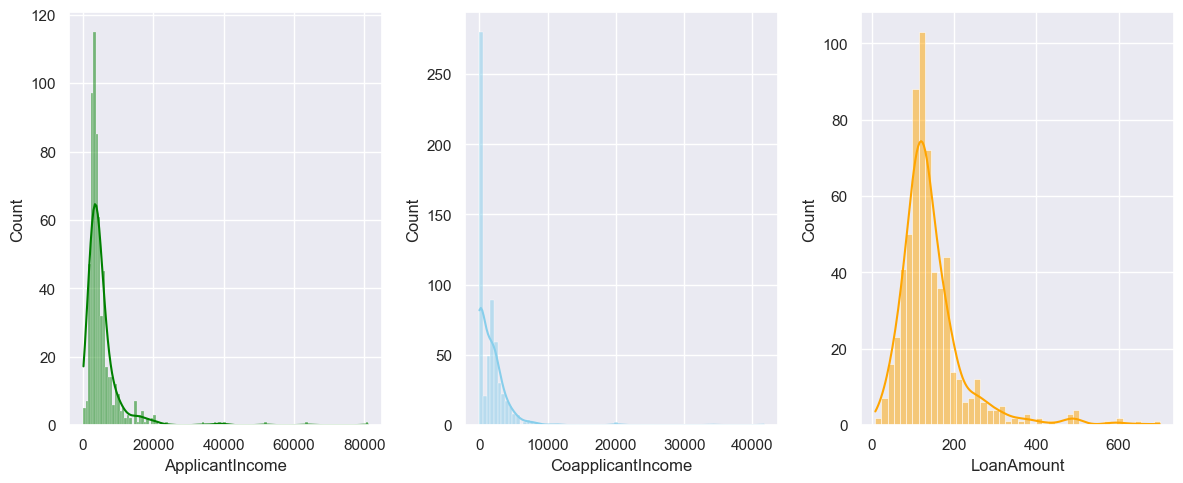

In [24]:
# Visualization for Numerical Column
fig, axs = plt.subplots(1, 3, figsize=(12,5))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[2], color='orange')
plt.tight_layout()

<Axes: >

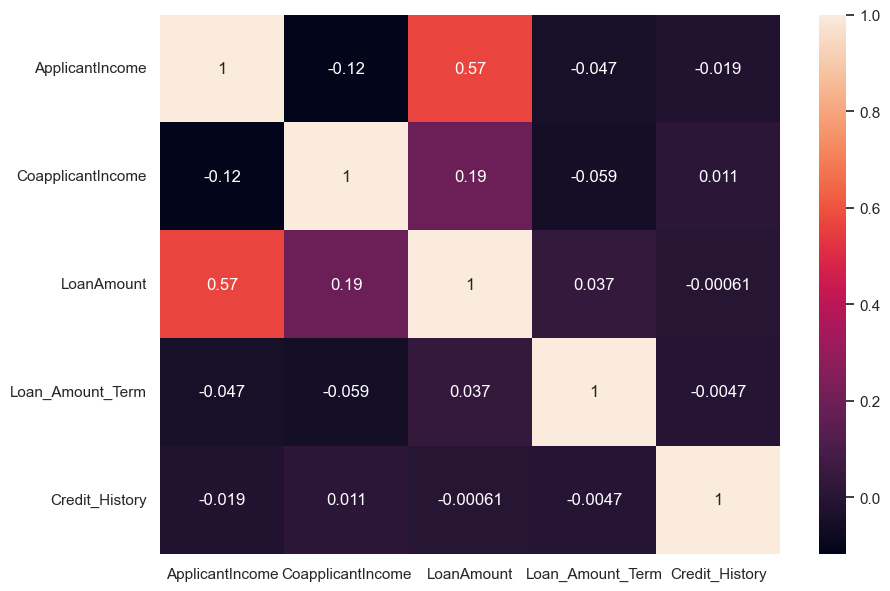

In [25]:
plt.figure(figsize=(10,7))
sns.heatmap(df[df.select_dtypes(exclude="object").columns.to_list()].corr(), annot=True)

ApplicantIncome
count of outliers:50
Percentage of Outliers:8.143322475570033
Total Percentage of Outliers:8.143322475570033


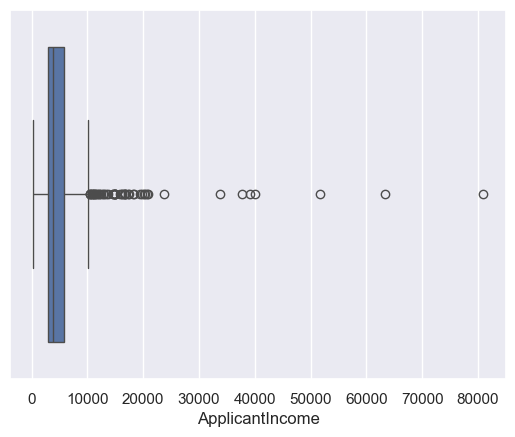

CoapplicantIncome
count of outliers:18
Percentage of Outliers:2.9315960912052117
Total Percentage of Outliers:11.074918566775244


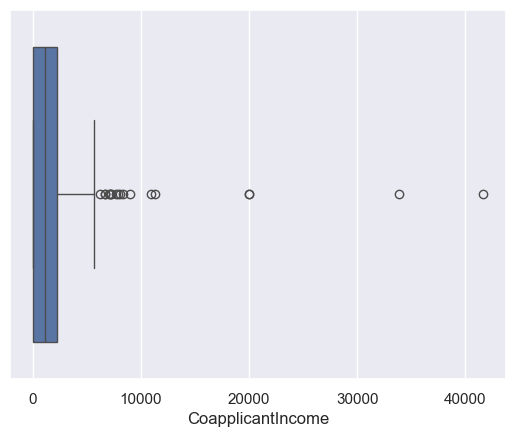

LoanAmount
count of outliers:41
Percentage of Outliers:6.677524429967427
Total Percentage of Outliers:17.752442996742673


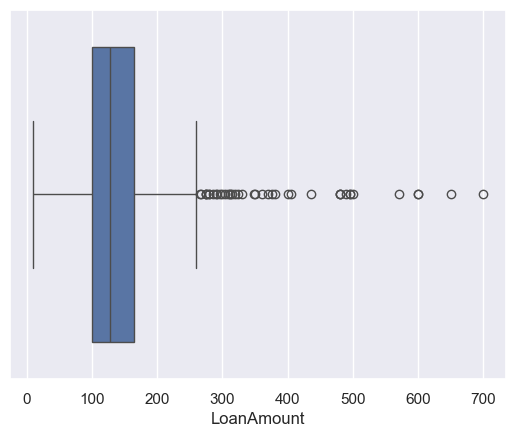

In [26]:
num_col = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
total_per = 0 
for cols in num_col:
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[cols] < lower_bound) | (df[cols] > upper_bound)][cols]

    print(cols)
    percent_outliers = (len(outliers)/len(df))*100
    total_per+= percent_outliers
    print(f"count of outliers:{len(outliers)}")
    print(f"Percentage of Outliers:{percent_outliers}")
    print(f"Total Percentage of Outliers:{total_per}")
    sns.boxplot(x=cols,data=df)
    plt.show()

In [27]:
# Create function to remove outliers
def remove_outlier(data, cols):
    for col in cols:
        # Calculate the IQR
        Q1 = np.quantile(data[col],0.25)
        Q3 = np.quantile(data[col],0.75)
        IQR = Q3 - Q1

        # Define the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove outliers for the current column
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

df = remove_outlier(df, num_col)


In [28]:
df['ApplicantIncome'] = np.sqrt(df['ApplicantIncome'])
df['CoapplicantIncome'] = np.sqrt(df['CoapplicantIncome'])

<Axes: xlabel='LoanAmount', ylabel='Count'>

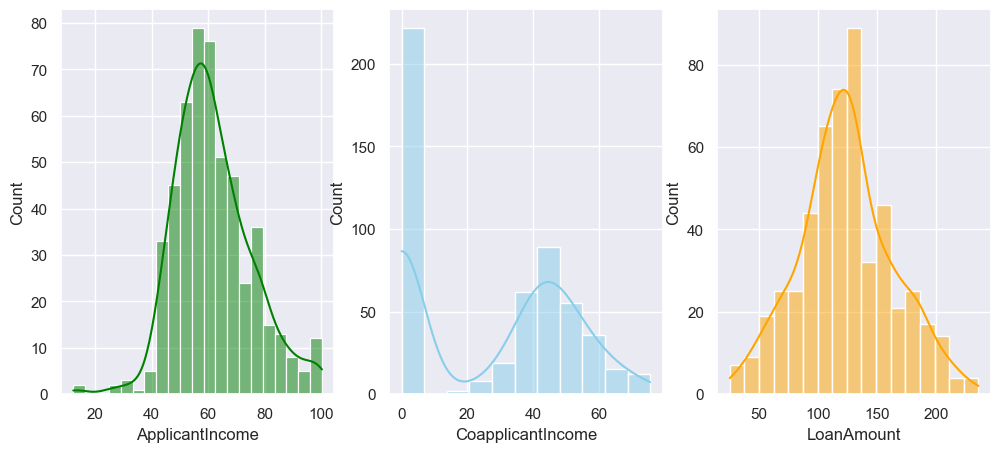

In [29]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(1, 3, figsize=(12,5))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[2], color='orange')

### Feature Engineering

In [30]:
# Initializing Ordinal Encoder
oe = OrdinalEncoder()
df[cat_col] = oe.fit_transform(df[cat_col])


In [31]:
# Splitting data into feature and target
x = df.drop('Loan_Status',axis=1) # Feature
y = df['Loan_Status'] # Target

In [32]:
# Checking data balance or not
print(df['Loan_Status'].value_counts())
print((df['Loan_Status'].value_counts()/len(df['Loan_Status']))*100)

Loan_Status
1.0    362
0.0    158
Name: count, dtype: int64
Loan_Status
1.0    69.615385
0.0    30.384615
Name: count, dtype: float64


In [33]:
# Initializing SMOTE to avoid over sampling 
sm = SMOTE()
X, Y = sm.fit_resample(x,y)

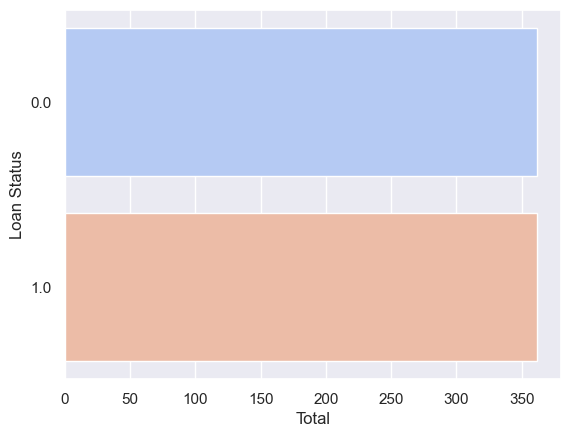

In [34]:
sns.set_theme(style="darkgrid")
sns.countplot(y=Y, data=df, palette="coolwarm")
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.show()

### Model Training and Evaluation

In [35]:
# Splitting data into training and testing set
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=2023)

In [36]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((579, 11), (145, 11), (579,), (145,))

In [37]:
# Scale the feature using StandardScalar
sc = StandardScaler()
Xtrain = sc.fit_transform(xtrain)
Xtest = sc.transform(xtest)

In [38]:
# Initializing Classification model
lg = LogisticRegression(random_state=40)
sv = SVC(random_state=40)
dt = DecisionTreeClassifier(random_state=40)
rf = RandomForestClassifier(random_state=40)

model = [lg,sv,dt,rf]
mod_name = ['LogisticRegression','SVC','DecisionTreeClassifier','RandomForestClassifier']

In [39]:
# Create Class_model function to train the model 
def Class_Model(model,Mod_Name):
    # create empty list to store accuracy score and f1 score
    Acc = []
    F1 = []
    Train = []
    Test = []

    for i in model:
        # fit the model for training data 
        i.fit(Xtrain,ytrain)
        ypred = i.predict(Xtest)

        # Model Evaluation
        ac = accuracy_score(ytest,ypred)
        f1 = f1_score(ytest,ypred)
        train = i.score(xtrain,ytrain) # training score
        test = i.score(xtest,ytest) # testing score

        Acc.append(ac)
        F1.append(f1)
        Train.append(train)
        Test.append(test)

    # return value in dataframe
    return pd.DataFrame({"Model":Mod_Name,"Accuracy":Acc,"F1 Score":F1,"Training Score":Train,"Testing Score":Test})


### Result

In [40]:
result = Class_Model(model,mod_name)
result

,Model,Accuracy,F1 Score,Training Score,Testing Score
0,LogisticRegression,0.772414,0.800000,0.488774,0.544828
1,SVC,0.779310,0.800000,0.511226,0.455172
2,DecisionTreeClassifier,0.779310,0.737705,0.488774,0.544828
3,RandomForestClassifier,0.917241,0.915493,0.488774,0.544828


In [41]:
rf2 = RandomForestClassifier(n_estimators=500,random_state=40,criterion='entropy')
rf2.fit(Xtrain,ytrain)
ypred2 = rf2.predict(Xtest)

In [42]:
accuracy = accuracy_score(ytest, ypred2)
print("Accuracy score:- ", accuracy)
print("\n ----- Classification Report ----- \n")
print(classification_report(ytest, ypred2))

Accuracy score:-  0.9103448275862069

 ----- Classification Report ----- 

              precision    recall  f1-score   support

         0.0       0.99      0.85      0.91        79
         1.0       0.84      0.98      0.91        66

    accuracy                           0.91       145
   macro avg       0.91      0.92      0.91       145
weighted avg       0.92      0.91      0.91       145



[[67 12]
 [ 1 65]]


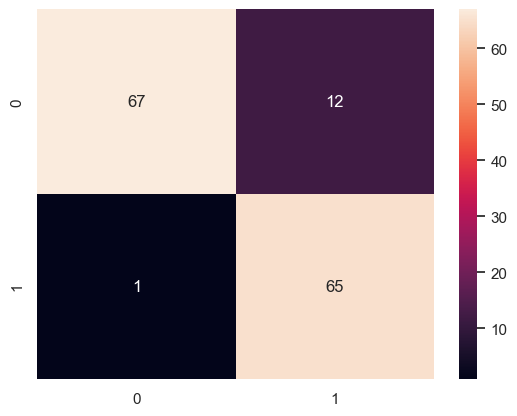

In [43]:
cm = confusion_matrix(ytest, ypred2)
print(cm)

sns.heatmap(cm, annot=True)
plt.show()

In [44]:
cv_scores = cross_val_score(rf2 ,X , Y, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(cv_scores))

# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(cv_scores.mean()))

Cross-validation scores:[0.72413793 0.76551724 0.91724138 0.93793103 0.95138889]
Average cross-validation score: 0.8592


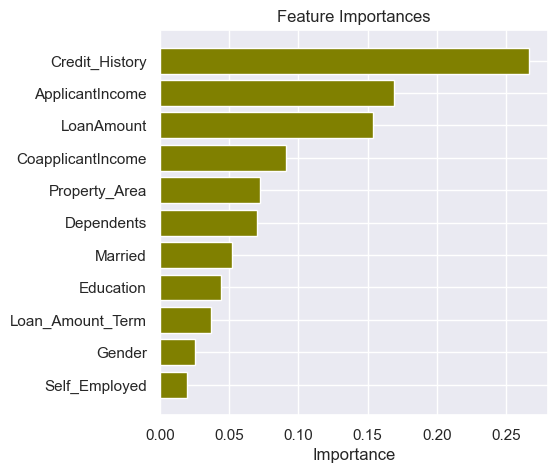

In [45]:
feature_importances = pd.DataFrame({
    'features': xtrain.columns,
    'importance': rf2.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()

plt.figure(figsize=(5,5))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='olive', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()